# Project: Investigate a Dataset - Database_TMDb_movie_data

In [4]:
%matplotlib inline

import pandas as pd 
import numpy as np 


In [5]:
db = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

Method usefull to understand the structure and size of our dbm

In [6]:
db.shape

(10866, 21)

this method provides a summary of the DataFrame, including the number of non-null values and the data types of each column. It's a quick way to get an overview of the data

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

i had to chage manually the budget for of The Warrior's Way because was incorrect. A film like this cannot have a budget higher than Pirati of Carabine ( i noticed this only at the and of my analysis.

In [9]:
idx = db['budget'].idxmax()
db.loc[idx]

db.loc[db['original_title'] == "The Warrior's Way", 'budget'] = 42500000

id                                                                  46528
imdb_id                                                         tt1032751
popularity                                                        0.25054
budget                                                          425000000
revenue                                                          11087569
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage                           http://www.iamrogue.com/thewarriorsway
director                                                       Sngmoo Lee
tagline                                           Assassin. Hero. Legend.
keywords                assassin|small town|revenge|deception|super speed
overview                An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                               100
genres                          Advent

The following method is a useful tool for quickly understanding the distribution and basic statistics of your data. It can help you identify outliers, understand the range of values, and get a general sense of the data's central tendency and spread.

In [11]:
db.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.459050e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.066263e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


fill with N/A the missing value in the columns specifing in the array columns_no_value. THe array contains only the columns with data type String. For that reason i used N/A to complete the missing value

In [12]:
columns_no_value = db.columns[db.isnull().any()]
for x in columns_no_value : db[x].fillna('N/A',inplace=True)

convert release _year into integer

In [13]:
db['release_year'] = db['release_year'].astype(int)

remuve duplicate

In [14]:
db.drop_duplicates(inplace = True)

remuve columns release date because some values are inconsisten, so i left the release year after converting it into integer for the next step of analysis. After i noticed that the dataset had a lot of rows where the revenue and budget were 0. To analyse better the result i dediced not to considerer these rows and so i filtered them out.

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

db_final = db.drop('release_date',axis=1)

db_final = db_final[(db_final['budget'] != 0) & (db_final['revenue'] != 0)]

generate a correlation matrix using a function in these way i can recall it anytime. With this matrix i identify a strong correlation between revenue and budget and also budget and vote count

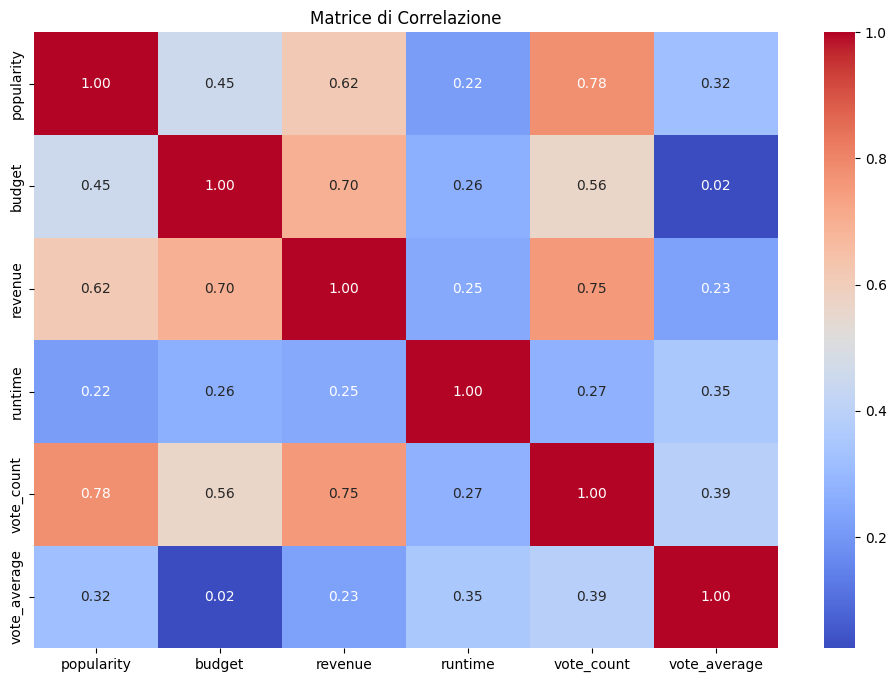

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def calcola_correlazioni(dataframe, colonne):
    
    db_subset = db_final[colonne]
    correlation_matrix = db_subset.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matrice di Correlazione")
    plt.show()

# Test della funzione con le colonne di interesse
colonne_di_interesse = ['popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average']
calcola_correlazioni(db_final, colonne_di_interesse)


### Research Question 1 (Profit)

In [24]:
pd.options.display.float_format = '{:,.0f}'.format

db_final['profit'] = db_final['revenue'] - db_final['budget']
db_final['profit_adj'] = db_final['revenue_adj'] - db_final['budget_adj']

db_final.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
count,"3,854","3,854","3,854","3,854","3,854","3,854","3,854","3,854","3,854","3,854","3,854","3,854"
mean,"39,888",1,"37,104,449","107,686,616",109,528,6,"2,001","44,239,993","137,064,690","70,582,167","92,824,697"
std,"67,223",1,"41,743,272","176,539,346",20,880,1,11,"44,809,254","216,111,351","150,426,163","194,071,460"
min,5,0,1,2,15,10,2,"1,960",1,2,"-165,710,090","-413,912,431"
25%,"6,074",0,"10,000,000","13,600,032",95,71,6,"1,995","13,090,528","18,357,350","-1,321,535","-1,504,995"
50%,"11,322",1,"24,000,000","44,800,002",106,204,6,"2,004","30,016,112","61,730,679","20,020,190","27,370,641"
75%,"38,573",1,"50,000,000","124,212,541",119,580,7,"2,010","60,613,070","163,257,655","81,703,308","107,454,751"
max,"417,859",33,"380,000,000","2,781,505,847",338,"9,767",8,"2,015","425,000,000","2,827,123,750","2,544,505,847","2,750,136,651"


## Movie Profit Analysis

- **Total number of movies**: 3854

- **Average Profit**
  - **Unadjusted**: $70.5M
  - **Adjusted for Inflation**: $92.8M

- **Standard Deviation of Profit**
  - **Unadjusted**: $96.6M
  - **Adjusted for Inflation**: $150.6M

- **Least Profitable Movie**
  - **Loss**: $167.7M

- **Percentage of Unprofitable Movies**: 25%

- **Median Profit**
  - **Value**: $20M (indicating that at least half of the movies make a profit)

- **Top 25% of Movies**
  - **Minimum Profit to be in the Top 25%**
    - **Unadjusted**: $81.7M
    - **Adjusted for Inflation**: $107M

- **Highest Profit Made by a Movie**
  - **Unadjusted**: $2.5B
  - **Adjusted for Inflation**: $2.8B



i would like to understand the ratio between each category to understand the weight of each range compared to the total number of films analyzed and how the

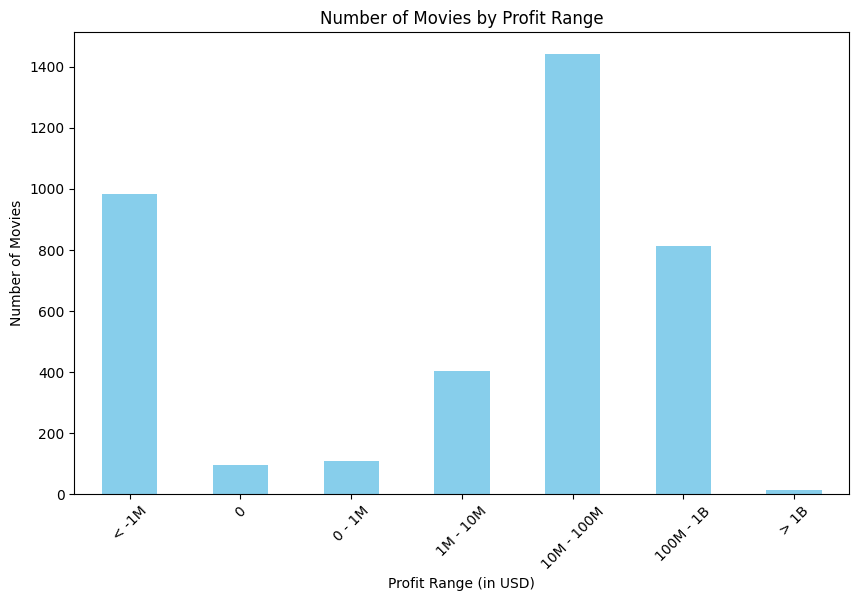

In [25]:
# Define profit bins and labels
profit_bins = [-1e10, -1e6, 0, 1e6, 1e7, 1e8, 1e9, 1e10]
profit_labels = ['< -1M', '0', '0 - 1M', '1M - 10M', '10M - 100M', '100M - 1B', '> 1B']

db_final['profit_range'] = pd.cut(db_final['profit'], bins= profit_bins, labels=profit_labels)
# Group by 'profit_range' to count the number of movies in each range
profit_movie_count = db_final.groupby('profit_range')['id'].size().reset_index(name = 'number_of_movies')

bar_plot = profit_movie_count.plot(kind='bar',
                                          x='profit_range',
                                          y='number_of_movies',
                                          figsize=(10, 6),
                                          legend=False,
                                          color='skyblue',
                                          title='Number of Movies by Profit Range')
bar_plot.set_xlabel('Profit Range (in USD)')
bar_plot.set_ylabel('Number of Movies')
bar_plot.set_xticklabels(profit_movie_count['profit_range'], rotation=45);

In [26]:
db_recap = db_final.groupby('profit_range')['id'].count().reset_index()

db_recap['ratio'] = (db_recap['id']/db_recap['id'].sum())*100

db_recap

,profit_range,id,ratio
0,< -1M,982,25
1,0,94,2
2,0 - 1M,107,3
3,1M - 10M,404,10
4,10M - 100M,1441,37
5,100M - 1B,813,21
6,> 1B,13,0


here below , i tried to find the film with the worst result in term of profit

In [127]:
idx = db_final['profit'].idxmin()
db.loc[idx]

id                                                                  57201
imdb_id                                                         tt1210819
popularity                                                              1
budget                                                          255000000
revenue                                                          89289910
original_title                                            The Lone Ranger
cast                    Johnny Depp|Armie Hammer|William Fichtner|Hele...
homepage                            http://disney.go.com/the-lone-ranger/
director                                                   Gore Verbinski
tagline                                           Never Take Off the Mask
keywords                        texas|horse|survivor|texas ranger|partner
overview                The Texas Rangers chase down a gang of outlaws...
runtime                                                               149
genres                                

### Research Question 2  (TOP_MOVIES BY PROFIT and ROI)

i would like to understand which were the movies with the highest revenue and ROI. I group the dataframe by original title and subset to get all the movies with a revenue greater than 1B and a ROI greater of 300. 

To create the KPI ROI , i had just diveded the revenue by budget

In [58]:
movies = db_final.groupby('original_title')[['budget','revenue','vote_average','profit']].mean()

movies['ROI'] = (movies['profit']-movies['budget'])/movies['budget']*100

final_db = movies[(movies['ROI']>=300) & (movies['revenue']>=1000000000)].sort_values(by = 'ROI',ascending = False).reset_index()
final_db.columns

Index(['original_title', 'budget', 'revenue', 'vote_average', 'profit', 'ROI'], dtype='object')

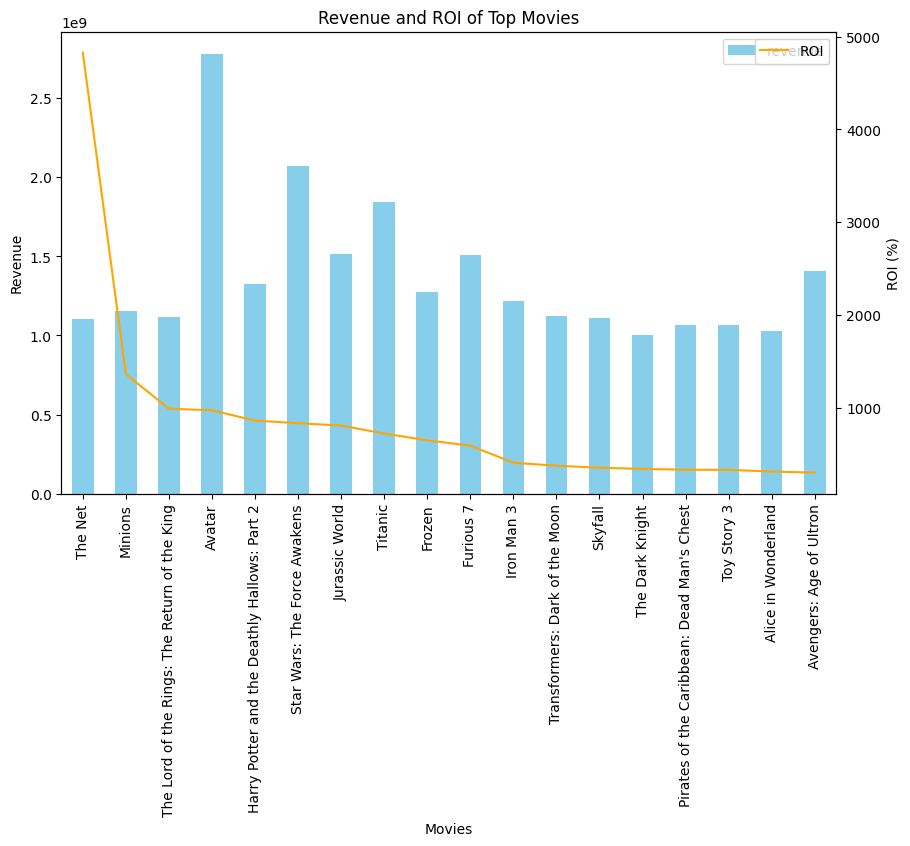

In [63]:
# Creazione del grafico a barre per 'revenue'
ax = final_db.plot(x='original_title', y='revenue', kind='bar', color='skyblue', figsize=(10, 6), title='Revenue and ROI of Top Movies')

# Creazione di un secondo asse y per 'ROI'
ax2 = ax.twinx()
final_db.plot(x='original_title', y='ROI', kind='line', color='orange', ax=ax2)

# Impostazione delle etichette degli assi
ax.set_xlabel('Movies')
ax.set_ylabel('Revenue')
ax2.set_ylabel('ROI (%)')

# Rotazione delle etichette sull'asse x di 45 gradi
plt.xticks(rotation=45)

plt.show()



# FIRST QUESTION

After cleaning up the dataset, I became interested in understanding the profit generated by each film. My analysis revealed that 37% of the movies made a profit ranging from $10M to $100M. Intriguingly, 25% of the films did not generate any profit at all. Notably, 'The Lone Ranger' emerged as the least profitable film in the dataset

# SECOND QUESTION 

After analyzing the profits, I became curious to understand which movies performed the best in terms of both revenue and Return on Investment (ROI). Pursuing this inquiry, I discovered that the top two films in terms of ROI and Revenue were 'The Net' and 'Minions'. Despite having lower budgets, they managed to achieve significantly high profits and garnered revenues comparable to the most well-known films.

#  LIMITATION

Issues with the Dataset:

Sample Data Limitations: The analysis is based on a sample of the total population of movies, carrying inherent uncertainty as different samples might yield different results. This is a fundamental limitation in statistical analysis.

Data Quality and Completeness: There may be missing observations or inconsistent data in the dataset, affecting the accuracy of the analysis. For example, if key financial data is missing for certain movies, it could skew the analysis of budget-revenue relationships.
Survivorship Bias: The dataset might be biased towards more successful or popular films, potentially omitting lesser-known or less successful films, limiting the generalizability of the findings.
Issues with the Methods of Analysis:

Constraints Due to Data Availability: The desired analytical approach might be limited by the available data. For example, if we want to analyze the impact of specific marketing strategies on a movie's success, but the dataset doesn't include marketing data, our analysis is limited.
Lack of Longitudinal Data: The dataset's lack of tracking changes over time (e.g., audience preferences or market trends) limits the ability to make temporal analyses.
Absence of Statistical Inference:

Lack of Significance Testing: The analysis did not include statistical tests to evaluate the significance of the findings. While descriptive statistics and correlation analysis provide insights, they do not establish causality or the statistical significance of the relationships observed.
Specific Data Filtering Approach:

Exclusion of Films with Zero Budget and Revenue: By creating a subset of the dataframe that excludes films with zero budget and revenue, the analysis potentially omits a significant portion of the film industry. This includes low-budget or indie films that don't report budget/revenue, or films that failed to generate revenue. Such exclusion can bias the analysis towards more commercially successful or mainstream films and impacts the generalizability of the results.

In [128]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 682010 bytes to Investigate_a_Dataset.html
